In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inventorize as inv

In [2]:
df = pd.read_csv('twentyeleven.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      484329 non-null  float64
 1   StockCode    484330 non-null  object 
 2   Description  484330 non-null  object 
 3   Quantity     484330 non-null  int64  
 4   InvoiceDate  484330 non-null  object 
 5   Price        484330 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      484330 non-null  object 
 8   date         484330 non-null  object 
 9   revenue      484330 non-null  float64
 10  year         484330 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 40.6+ MB


In [4]:
df = df.dropna(axis=0)
df.shape

(367058, 11)

In [5]:
df_group = df.groupby('Description').agg(total_sales=('Quantity','sum'),total_revenue=('revenue','sum')).reset_index()
df_group

,Description,total_sales,total_revenue
0,10 COLOUR SPACEBOY PEN,5720,4744.22
1,12 COLOURED PARTY BALLOONS,2041,1328.45
2,12 DAISY PEGS IN WOOD BOX,312,514.80
3,12 EGG HOUSE PAINTED WOOD,109,1399.77
4,12 HANGING EGGS HAND PAINTED,40,83.20
...,...,...,...
3767,ZINC T-LIGHT HOLDER STARS SMALL,4894,3879.98
3768,ZINC TOP 2 DOOR WOODEN SHELF,9,152.55
3769,ZINC WILLIE WINKIE CANDLE STICK,2432,2028.20
3770,ZINC WIRE KITCHEN ORGANISER,25,156.80


In [6]:
a = inv.ABC(df_group[['Description','total_sales']])
a

,Description,total_sales,Percentage,comulative,Category
3684,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49180,1.046469e-02,0.010465,A
1697,JUMBO BAG RED RETROSPOT,44022,9.367152e-03,0.019832,A
3597,WHITE HANGING HEART T-LIGHT HOLDER,33095,7.042068e-03,0.026874,A
204,ASSORTED COLOUR BIRD ORNAMENT,33004,7.022704e-03,0.033897,A
2519,POPCORN HOLDER,30919,6.579051e-03,0.040476,A
...,...,...,...,...,...
2863,SET 36 COLOURING PENCILS DOILEY,1,2.127834e-07,0.999999,C
3451,VINTAGE BEAD PINK JEWEL STAND,1,2.127834e-07,0.999999,C
1176,FIRE POLISHED GLASS BRACELET BLACK,1,2.127834e-07,1.000000,C
1615,I LOVE LONDON MINI RUCKSACK,1,2.127834e-07,1.000000,C


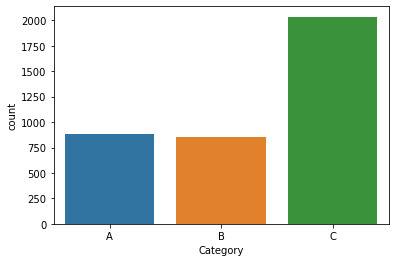

In [7]:
sns.countplot(x='Category',data=a);

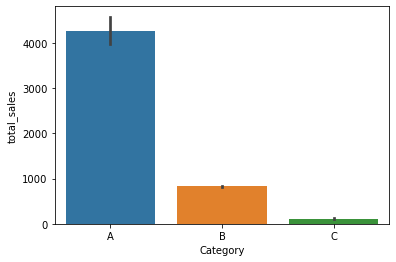

In [8]:
sns.barplot(x='Category',y='total_sales',data=a);

In [9]:
product_mix = inv.productmix(df_group['Description'],df_group['total_sales'],df_group['total_revenue'])
product_mix

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
2681,REGENCY CAKESTAND 3 TIER,10820,124683.250,2.302317e-03,0.193247,1.544801e-02,0.015448,A,A,A_A
3597,WHITE HANGING HEART T-LIGHT HOLDER,33095,90790.050,7.042068e-03,0.026874,1.124871e-02,0.026697,A,A,A_A
1697,JUMBO BAG RED RETROSPOT,44022,81421.340,9.367152e-03,0.019832,1.008795e-02,0.036785,A,A,A_A
2530,POSTAGE,2901,73391.960,6.172847e-04,0.600097,9.093122e-03,0.045878,A,A,A_A
2274,PARTY BUNTING,15093,67991.730,3.211540e-03,0.112839,8.424044e-03,0.054302,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...
1118,FAIRY CAKE NOTEBOOK A5 SIZE,1,0.850,2.127834e-07,0.999994,1.053134e-07,1.000000,C,C,C_C
2370,PINK CRYSTAL GUITAR PHONE CHARM,1,0.850,2.127834e-07,0.999995,1.053134e-07,1.000000,C,C,C_C
2844,SET 12 COLOURING PENCILS DOILEY,1,0.650,2.127834e-07,0.999996,8.053374e-08,1.000000,C,C,C_C
1566,HEN HOUSE W CHICK IN NEST,1,0.420,2.127834e-07,0.999993,5.203719e-08,1.000000,C,C,C_C


In [10]:
product_mix.product_mix.value_counts()

C_C    1711
A_A     558
B_B     382
A_B     275
C_B     274
B_C     267
B_A     205
C_A      51
A_C      49
Name: product_mix, dtype: int64

In [11]:
df_group_country = df.groupby(['Description','Country']).agg(total_sales=('Quantity','sum'),
                                                               total_revenue=('revenue','sum')).reset_index()
df_group_country

,Description,Country,total_sales,total_revenue
0,10 COLOUR SPACEBOY PEN,Australia,48,40.80
1,10 COLOUR SPACEBOY PEN,Canada,24,20.40
2,10 COLOUR SPACEBOY PEN,EIRE,192,163.20
3,10 COLOUR SPACEBOY PEN,France,312,265.20
4,10 COLOUR SPACEBOY PEN,Germany,264,224.40
...,...,...,...,...
18715,ZINC WILLIE WINKIE CANDLE STICK,United Kingdom,1832,1568.12
18716,ZINC WIRE KITCHEN ORGANISER,Portugal,1,10.40
18717,ZINC WIRE KITCHEN ORGANISER,United Kingdom,24,146.40
18718,ZINC WIRE SWEETHEART LETTER TRAY,EIRE,8,10.00


In [12]:
coun_prdmix = inv.productmix_storelevel(df_group_country['Description'],df_group_country['total_sales'],
                                       df_group_country['total_revenue'],df_group_country['Country'])
coun_prdmix

C:\Users\mee\anaconda3\lib\site-packages\inventorize\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])


,sku,sales,revenue,storeofsku,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
12069,RABBIT NIGHT LIGHT,1884,3375.84,Australia,0.022498,0.057749,0.024554,0.024554,A,A,A_A
14949,SET OF 6 SPICE TINS PANTRY DESIGN,600,2082.00,Australia,0.007165,0.170619,0.015143,0.039697,A,A,A_A
12880,RED TOADSTOOL LED NIGHT LIGHT,1344,1987.20,Australia,0.016049,0.094146,0.014454,0.054150,A,A,A_A
14385,SET OF 3 CAKE TINS PANTRY DESIGN,464,1983.20,Australia,0.005541,0.221657,0.014424,0.068575,A,A,A_A
12936,REGENCY CAKESTAND 3 TIER,180,1978.20,Australia,0.002149,0.684734,0.014388,0.082963,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...,...
8722,LUNCH BAG SPACEBOY DESIGN,10,16.50,Brazil,0.028090,0.837079,0.014428,0.943599,B,B,B_B
12162,RECYCLED ACAPULCO MAT BLUE,2,16.50,Brazil,0.005618,0.971910,0.014428,0.958027,C,C,C_C
8660,LUNCH BAG DOLLY GIRL DESIGN,10,16.50,Brazil,0.028090,0.808989,0.014428,0.972455,B,C,B_C
12221,RECYCLED ACAPULCO MAT TURQUOISE,2,16.50,Brazil,0.005618,1.000000,0.014428,0.986884,C,C,C_C


In [15]:
ire = coun_prdmix[coun_prdmix['storeofsku']=='EIRE']
ire

,sku,sales,revenue,storeofsku,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
12944,REGENCY CAKESTAND 3 TIER,597,6805.35,EIRE,0.004418,0.217228,0.026537,0.026537,A,A,A_A
2740,CARRIAGE,92,4575.00,EIRE,0.000681,0.707378,0.017840,0.044377,A,A,A_A
254,3 TIER CAKE TIN RED AND CREAM,331,4235.65,EIRE,0.002449,0.398424,0.016517,0.060893,A,A,A_A
9671,Manual,2,3374.34,EIRE,0.000015,0.999386,0.013158,0.074051,C,A,C_A
7671,JAM MAKING SET WITH JARS,738,2899.50,EIRE,0.005461,0.168438,0.011306,0.085358,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...,...
13629,ROUND PURPLE CLOCK WITH SUCKER,10,1.90,EIRE,0.000074,0.984237,0.000007,0.999974,C,C,C_C
8838,MAGIC DRAWING SLATE BAKE A CAKE,4,1.68,EIRE,0.000030,0.997543,0.000007,0.999980,C,C,C_C
8842,MAGIC DRAWING SLATE BUNNIES,4,1.68,EIRE,0.000030,0.998402,0.000007,0.999987,C,C,C_C
8873,MAGIC DRAWING SLATE LEAP FROG,4,1.68,EIRE,0.000030,0.998254,0.000007,0.999993,C,C,C_C


In [16]:
ire.product_mix.value_counts()

C_C    571
A_A    332
B_B    329
B_C    212
C_B    204
A_B    143
B_A     94
A_C     37
C_A     23
Name: product_mix, dtype: int64

In [29]:
coun = coun_prdmix.groupby(['storeofsku','product_mix']).count().reset_index()
coun

,storeofsku,product_mix,sku,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category
0,Australia,A_A,149,149,149,149,149,149,149,149,149
1,Australia,A_B,63,63,63,63,63,63,63,63,63
2,Australia,A_C,20,20,20,20,20,20,20,20,20
3,Australia,B_A,58,58,58,58,58,58,58,58,58
4,Australia,B_B,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...
306,Unspecified,B_B,16,16,16,16,16,16,16,16,16
307,Unspecified,B_C,4,4,4,4,4,4,4,4,4
308,Unspecified,C_A,10,10,10,10,10,10,10,10,10
309,Unspecified,C_B,14,14,14,14,14,14,14,14,14
